In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt

patients_data = pd.read_csv('merged_data.csv')
labelValues = pd.read_csv('full_patient_data.csv')

LABEL_VALUE = 1035

lv_1015 = labelValues[labelValues['LabelValue'] == LABEL_VALUE]

lv_1015_with_p = pd.merge(lv_1015, patients_data, left_on='Patient', right_on='MRI')

lv_1015_with_p.head(5)

,Unnamed: 0_x,LabelValue,Volume,Mass,Patient,Unnamed: 0_y,Gender,FirstName,Code,MRI,...,Speaking X,Feeding other than liquds X,Bringing liquods to mouth X,Hygiene X,Dressing X,Writing X,Working X,Sum X,Right,Left
0,31,1035.0,1141.25,19.624401,4698,18,0,Anna-Maria,4y,4698,...,0.000000,2,4,0,1,2,1,31.000000,11.000000,11.666667
1,31,1035.0,1417.50,28.793330,4701,14,1,Wolfgang,3y,4701,...,0.333333,2,4,0,1,3,2,39.333333,15.666667,13.000000
2,31,1035.0,1336.25,17.055437,4708,2,1,Werner,14o,4708,...,0.000000,1,1,0,0,1,0,21.333333,7.333333,10.666667
3,31,1035.0,1241.25,18.419544,4710,19,0,Janika,5y,4710,...,0.333333,0,0,0,0,1,3,21.333333,9.666667,8.000000
4,31,1035.0,1166.25,18.261038,4713,0,1,Hans-Peter,10y,4713,...,0.666667,2,2,0,0,4,2,28.000000,7.333333,10.333333


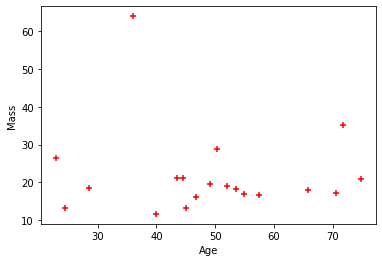

In [2]:
# select columns to be tested on linear regression

y_label_1015 = lv_1015_with_p[['Mass']]
x_age = lv_1015_with_p[['Age']]

# %matplotlib inline
plt.xlabel('Age')
plt.ylabel('Mass')
plt.scatter(x_age, y_label_1015, color='red', marker='+')

In [3]:
model = LinearRegression().fit(x_age, y_label_1015)

model.predict([[10]])

array([[23.96801166]])

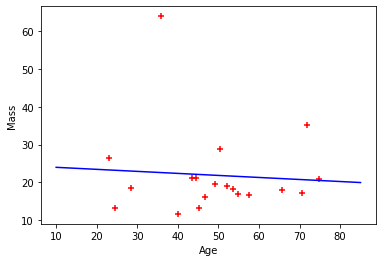

In [4]:
x_range = np.linspace(10, 85, 100)
y_range = model.predict(x_range.reshape(-1, 1))

plt.xlabel('Age')
plt.ylabel('Mass')
plt.scatter(x_age, y_label_1015, color='red', marker='+')
plt.plot(x_range, y_range, color='blue')

In [5]:

fig = px.scatter(lv_1015_with_p, x='Age', y='Mass', title=f'Label Value: {LABEL_VALUE}')
fig.add_trace(go.Scatter(x=x_range, y=y_range.flatten(), name='Regression Fit'))
fig.show()

In [7]:
fig = px.scatter(lv_1015_with_p, x='Age', y='Mass', title=f'Label Value: {LABEL_VALUE}', trendline='ols', trendline_color_override='red')
fig.show()